##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.


# Load images

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/load_data/images"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/load_data/images.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/load_data/images.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/load_data/images.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial provides a simple example of how to load an image dataset using `tf.data`.

The dataset used in this example is distributed as directories of images, with one class of image per directory.

## Setup

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
try:
  # %tensorflow_version only exists in Colab.
  !pip install -q tf-nightly
except Exception:
  pass
import tensorflow as tf

In [4]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [5]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
tf.__version__

'2.1.0-dev20191104'

### Retrieve the images

Before you start any training, you will need a set of images to teach the network about the new classes you want to recognize. You can use an archive of creative-commons licensed flower photos from Google.

Note: all images are licensed CC-BY, creators are listed in the `LICENSE.txt` file.

In [7]:
import pathlib
#data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         #fname='flower_photos', untar=True)
    
train_data_dir = 'C:/Users/marireeves/Documents/RatTrapFever/Data/20_02_01_Out/Training/'
train_data_dir = pathlib.Path(train_data_dir)
train_image_count = len(list(train_data_dir.glob('*/*.jpg')))
print(train_image_count)

test_data_dir = 'C:/Users/marireeves/Documents/RatTrapFever/Data/20_02_01_Out/Validation/'
test_data_dir = pathlib.Path(test_data_dir)
test_image_count = len(list(test_data_dir.glob('*/*.jpg')))
print(test_image_count)

pred_data_dir = 'C:/Users/marireeves/Documents/RatTrapFever/Data/ForPredictions/'
pred_data_dir = pathlib.Path(pred_data_dir)
pred_image_count = len(list(pred_data_dir.glob('*/*.jpg')))
print(pred_image_count)

model_save_dir = 'C:/Users/marireeves/Documents/RatTrapFever/Data/'



2839
756
59326


The directory contains 5 sub-directories, one per class:

In [8]:
CLASS_NAMES = np.array([item.name for item in train_data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['Birds', 'Deer', 'Humans', 'Mice', 'Pigs', 'Rats', 'Traps',
       'Tunnels'], dtype='<U7')

Each directory contains images of that type of animal. Here are some rats from the training dataset:

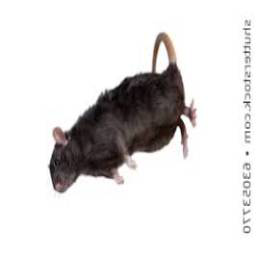

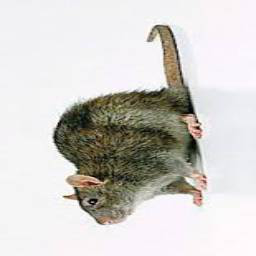

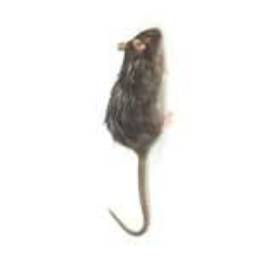

In [9]:
Rats = list(train_data_dir.glob('Rats/*'))

for image_path in Rats[:3]:
    display.display(Image.open(str(image_path)))

And here are some test rats:

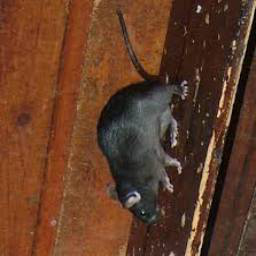

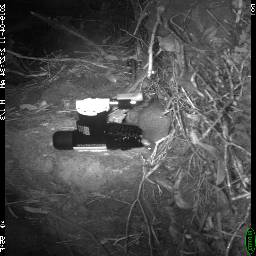

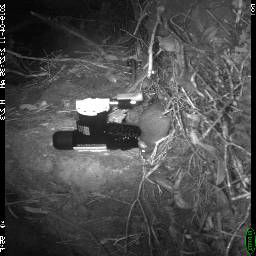

In [10]:
TestRats = list(test_data_dir.glob('Rats/*'))

for image_path in TestRats[:3]:
    display.display(Image.open(str(image_path)))

## Load using `keras.preprocessing`

A simple way to load images is to use `tf.keras.preprocessing`.

In [11]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

Define some parameters for the loader:

In [12]:
Train_BATCH_SIZE = 300
Test_BATCH_SIZE = 50
IMG_HEIGHT = 256
IMG_WIDTH = 256
STEPS_PER_EPOCH = np.ceil(train_image_count/Train_BATCH_SIZE)

In [13]:
train_data_gen = image_generator.flow_from_directory(directory=str(train_data_dir),
                                                     batch_size=Train_BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 2839 images belonging to 8 classes.


Repeat this for the test data generator, but using smaller batches because there are fewer photos.

In [14]:
test_data_gen = image_generator.flow_from_directory(directory=str(test_data_dir),
                                                     batch_size=Test_BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 756 images belonging to 8 classes.


In [15]:
pred_data_gen = image_generator.flow_from_directory(directory=str(pred_data_dir),
                                                     batch_size=1000,
                                                     shuffle=False, 
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = None)

Found 59326 images belonging to 1 classes.


Inspect a batch:

In [16]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(8):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

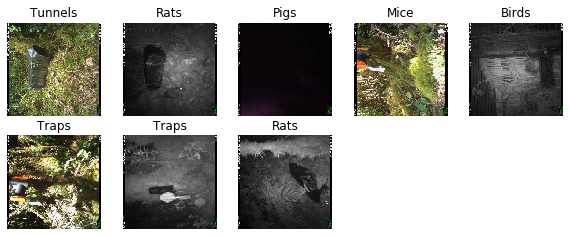

In [17]:
train_image_batch, train_label_batch = next(train_data_gen)
show_batch(train_image_batch, train_label_batch)

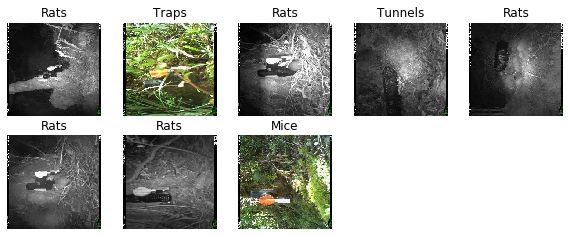

In [18]:
test_image_batch, test_label_batch = next(test_data_gen)
show_batch(test_image_batch, test_label_batch)

In [19]:
def show_pred_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(8):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

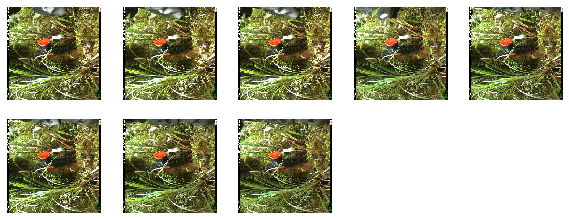

In [20]:
pred_image_batch, pred_label_batch = next(pred_data_gen)
show_pred_batch(pred_image_batch, pred_label_batch)

## Load using `tf.data`

In [21]:
train_list_ds = tf.data.Dataset.list_files(str(train_data_dir/'*/*'))
test_list_ds = tf.data.Dataset.list_files(str(test_data_dir/'*/*'))
pred_list_ds = tf.data.Dataset.list_files(str(pred_data_dir/'*'))

In [22]:
for f in train_list_ds.take(5):
  print(f.numpy())

b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\20_02_01_Out\\Training\\Traps\\RCNX0230 (10).JPG'
b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\20_02_01_Out\\Training\\Rats\\IMG_0168.JPG'
b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\20_02_01_Out\\Training\\Traps\\RCNX0110 (7).JPG'
b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\20_02_01_Out\\Training\\Rats\\RCNX0328.JPG'
b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\20_02_01_Out\\Training\\Tunnels\\RCNX0094.JPG'


In [23]:
for i in test_list_ds.take(5):
    print(i.numpy())

b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\20_02_01_Out\\Validation\\Tunnels\\IMG_0005_256x256.jpg'
b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\20_02_01_Out\\Validation\\Traps\\RCNX0434 (2)_256x256.jpg'
b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\20_02_01_Out\\Validation\\Traps\\RCNX0273 (9)_256x256.jpg'
b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\20_02_01_Out\\Validation\\Rats\\RCNX0130_256x256.jpg'
b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\20_02_01_Out\\Validation\\Humans\\RCNX0003 (4)_256x256.jpg'


In [24]:
for k in pred_list_ds.take(5):
    print(k.numpy())

b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\ForPredictions\\Raw\\May13_16 photos_MG05 (USFWS02)__RCNX0200_256x256.jpg'
b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\ForPredictions\\Raw\\June12_16 photos_CMG22 (ATC01)__RCNX0275_256x256.jpg'
b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\ForPredictions\\Raw\\Jul15_Jul18_Jul22-25photos_CMA09(DOFAW04)__101RECNX_RCNX0040_256x256.jpg'
b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\ForPredictions\\Raw\\May30_June3 photos_ME16 (USFWS 01)___RCNX0407_256x256.jpg'
b'C:\\Users\\marireeves\\Documents\\RatTrapFever\\Data\\ForPredictions\\Raw\\May13_16 photos_MG08 (ATC05)__RCNX0046_256x256.jpg'


Write a short pure-tensorflow function that converts a file paths to an (image_data, label) pair:

In [25]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, '\\')
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

In [26]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [27]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [28]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_labeled_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [29]:
test_labeled_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [30]:
pred_ds = pred_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [31]:
for image, label in train_labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (256, 256, 3)
Label:  [False False False False  True False False False]


In [32]:
for image, label in test_labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (256, 256, 3)
Label:  [False False  True False False False False False]


In [33]:
for image, label in pred_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (256, 256, 3)
Label:  [False False False False False False False False]


In [34]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(Train_BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [35]:
train_ds = prepare_for_training(train_labeled_ds)
test_ds = prepare_for_training(test_labeled_ds)

train_image_batch, train_label_batch = next(iter(train_ds))
test_image_batch, test_label_batch = next(iter(test_ds))

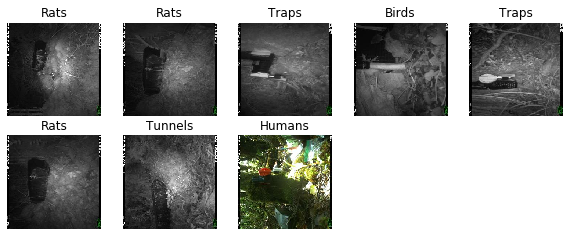

In [36]:
show_batch(test_image_batch.numpy(), test_label_batch.numpy())

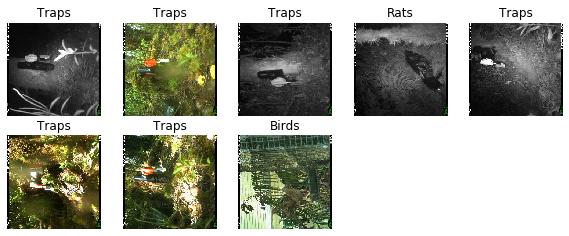

In [37]:
show_batch(train_image_batch.numpy(), train_label_batch.numpy())

### Here we switch gears to train the CNN model on these data. 

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb

In [38]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to our first layer.



In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.33))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.33))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of our model so far.

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        3

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top
To complete our model, you will feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs and a softmax activation.

In [41]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))
#Mari changed this from tutorial = 10 classes, to Mari has 8 classes

Here's the complete architecture of our model.

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        3

As you can see, our (3, 3, 64) outputs were flattened into vectors of shape (576) before going through two Dense layers.
#This is from the tutorial, but I actually do not see this...where are these numbers????

### Compile and train the model

In [43]:
print(train_image_batch.shape)
print(train_label_batch.shape)
print(test_image_batch.shape)
print(test_label_batch.shape)

(300, 256, 256, 3)
(300, 8)
(300, 256, 256, 3)
(300, 8)


In [44]:
train_labels = np.argmax(train_label_batch, axis=1)
print(train_labels.shape)
test_labels = np.argmax(test_label_batch, axis=1)
print(test_labels.shape)

(300,)
(300,)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_image_batch, train_labels, epochs=100, 
                    validation_data=(test_image_batch, test_labels))
                

Train on 300 samples, validate on 300 samples
Epoch 1/100
300/300 [==============================] - 17s 58ms/sample - loss: 5.2223 - accuracy: 0.2367 - val_loss: 2.0498 - val_accuracy: 0.3633
Epoch 2/100
300/300 [==============================] - 17s 57ms/sample - loss: 1.9111 - accuracy: 0.3000 - val_loss: 1.7787 - val_accuracy: 0.3633
Epoch 3/100
300/300 [==============================] - 17s 55ms/sample - loss: 1.7522 - accuracy: 0.3000 - val_loss: 1.4871 - val_accuracy: 0.4267
Epoch 4/100
300/300 [==============================] - 17s 55ms/sample - loss: 1.6251 - accuracy: 0.4400 - val_loss: 1.3425 - val_accuracy: 0.5800
Epoch 5/100
300/300 [==============================] - 17s 55ms/sample - loss: 1.3756 - accuracy: 0.5633 - val_loss: 1.2407 - val_accuracy: 0.6367
Epoch 6/100
300/300 [==============================] - 18s 59ms/sample - loss: 0.9876 - accuracy: 0.6900 - val_loss: 0.9103 - val_accuracy: 0.7300
Epoch 7/100
300/300 [==============================] - 17s 57ms/sample -

300/300 - 4s - loss: 0.6919 - accuracy: 0.8700


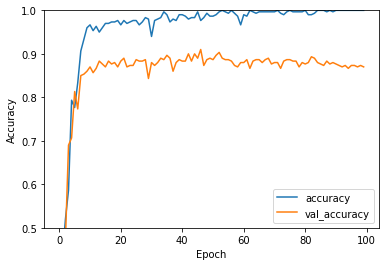

In [66]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_image_batch,  test_labels, verbose=2)

In [102]:
print(test_acc)

0.87


Now, we switch gears again to try and visualize the images we have misclassified. Microsoft AI for Earth is helpful here!
https://github.com/microsoft/CameraTraps/blob/master/classification/TUTORIAL.md

But still too much re-coding for me, so going more from scratch:
\https://www.tensorflow.org/guide/keras/train_and_evaluate

In [103]:
predictions = model.predict(pred_image_batch)

#this gives me an array of 50 predictions for my classes...but I want 60K
np.savetxt("mypred.csv", predictions, delimiter=",")


 Export the model to a SavedModel
model.save('path_to_saved_model', save_format='tf')

Recreate the exact same model
new_model = keras.models.load_model('path_to_saved_model')

Check that the state is preserved
new_predictions = new_model.predict(x_test)
np.testing.assert_allclose(predictions, new_predictions, rtol=1e-6, atol=1e-6)

 Note that the optimizer state is preserved as well:
you can resume training where you left off.

In [2]:
# Save the model

model_save_dir = 'C:/Users/marireeves/Documents/RatTrapFever/Data/'

model.save(model_save_dir)

# Recreate the exact same model purely from the file
new_model = keras.models.load_model(model_save_dir)

NameError: name 'model' is not defined

In [1]:
# Check that the state is preserved
new_predictions = new_model.predict(test_image_batch)
np.testing.assert_allclose(predictions, new_predictions, rtol=1e-6, atol=1e-6)

NameError: name 'new_model' is not defined

create a new dataset of all pictures to predict..ok, I did this in R. was easier for me. 20_02_03_CameraTrapImageWrangling.r

In [ ]:
print(pred_image_batch.shape)

print('\n# Generate predictions for 3 samples')
predict3 = model.predict(pred_image_batch[:3])
print('predictions shape:', predict3.shape)')

